In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
train = pd.read_csv("C:\\Users\\milan\\Downloads\\Project\\health care diabetes.csv")


In [67]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

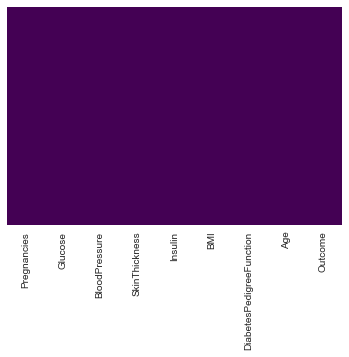

In [68]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

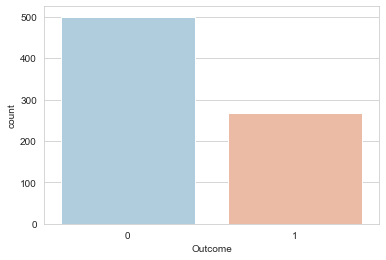

In [69]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

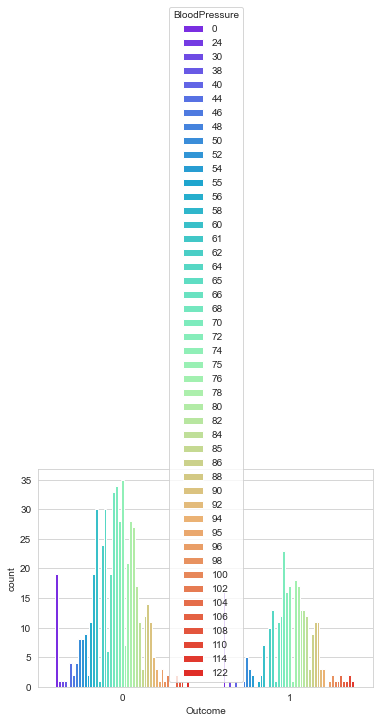

In [70]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=train,palette='rainbow',hue='BloodPressure')

C:\Users\milan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

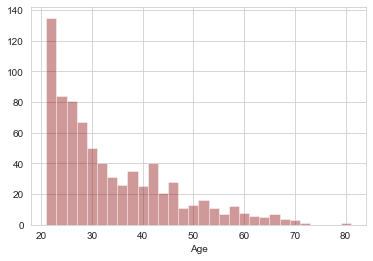

In [71]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:>

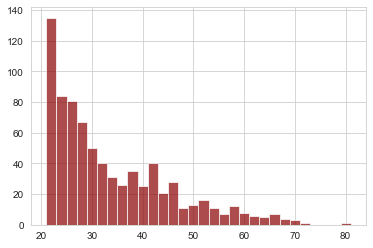

In [72]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='BMI', ylabel='count'>

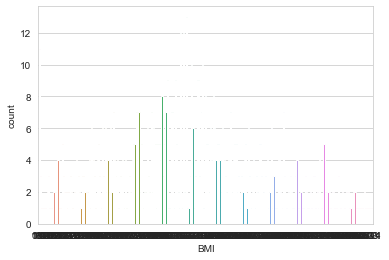

In [73]:
sns.countplot(x='BMI',data=train)

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

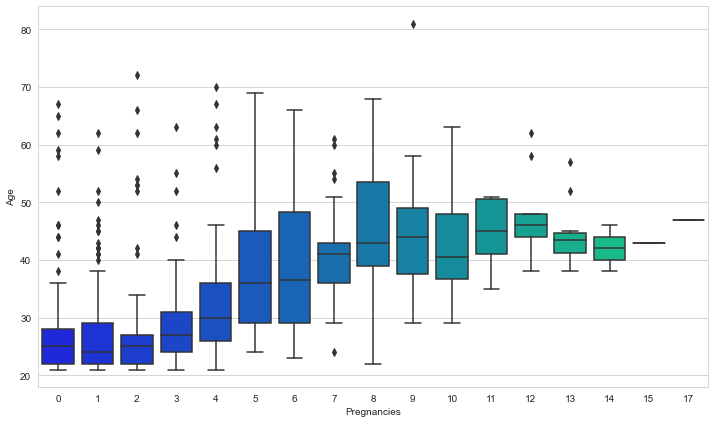

In [74]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pregnancies',y='Age',data=train,palette='winter')

<AxesSubplot:>

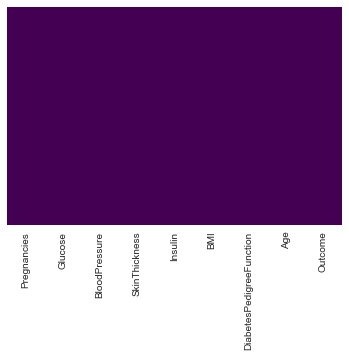

In [75]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [76]:
train.drop('DiabetesPedigreeFunction',axis=1,inplace=True)

In [77]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [78]:
train.dropna(inplace=True)

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Age            768 non-null    int64  
 7   Outcome        768 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 54.0 KB


In [80]:
from sklearn.model_selection import train_test_split


In [81]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Outcome',axis=1), 
                                                    train['Outcome'], test_size=0.30, 
                                                    random_state=101)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [84]:
predictions = logmodel.predict(X_test)

In [85]:
from sklearn.metrics import classification_report

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
print(accuracy_score(y_test,predictions))

0.7705627705627706


In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.71      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231

